<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#什么是线性回归" data-toc-modified-id="什么是线性回归-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>什么是线性回归</a></span><ul class="toc-item"><li><span><a href="#加利福尼亚放房价预测问题" data-toc-modified-id="加利福尼亚放房价预测问题-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>加利福尼亚放房价预测问题</a></span></li><li><span><a href="#下载数据集" data-toc-modified-id="下载数据集-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>下载数据集</a></span></li><li><span><a href="#拆分训练集和测试集" data-toc-modified-id="拆分训练集和测试集-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>拆分训练集和测试集</a></span></li><li><span><a href="#线性回归建模" data-toc-modified-id="线性回归建模-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>线性回归建模</a></span></li></ul></li><li><span><a href="#回归类的模型评估指标" data-toc-modified-id="回归类的模型评估指标-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>回归类的模型评估指标</a></span><ul class="toc-item"><li><span><a href="#MSE均方误差" data-toc-modified-id="MSE均方误差-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>MSE均方误差</a></span></li><li><span><a href="#交叉验证方法计算模型指标" data-toc-modified-id="交叉验证方法计算模型指标-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>交叉验证方法计算模型指标</a></span></li><li><span><a href="#MAE" data-toc-modified-id="MAE-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>MAE</a></span></li><li><span><a href="#是否拟合了足够的信息" data-toc-modified-id="是否拟合了足够的信息-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>是否拟合了足够的信息</a></span></li><li><span><a href="#把数据集标准化之后重复上面的过程" data-toc-modified-id="把数据集标准化之后重复上面的过程-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>把数据集标准化之后重复上面的过程</a></span></li><li><span><a href="#绘制拟合图像" data-toc-modified-id="绘制拟合图像-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>绘制拟合图像</a></span></li></ul></li></ul></div>

## 什么是线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')

In [4]:
# 先升值一个随机数种子
np.random.seed(666)
x = 10 * np.random.rand(50)
x

array([7.00437122, 8.44186643, 6.76514336, 7.27858057, 9.51457957,
       0.12703197, 4.13587699, 0.48812794, 0.99928561, 5.08066306,
       2.00247539, 7.44154169, 1.92892003, 7.00844752, 2.93228106,
       7.74479454, 0.05108839, 1.12857654, 1.10953672, 2.47668229,
       0.23236299, 7.27321154, 3.40034942, 1.97503156, 9.09179593,
       9.78346985, 5.32802544, 2.59131849, 5.83812619, 3.25690653,
       8.88899314, 6.26404527, 8.18873691, 5.4734542 , 4.16712006,
       7.43047192, 3.69596381, 0.75166544, 7.75192978, 2.19409244,
       0.79342127, 4.86780522, 1.53673902, 8.28465133, 1.91368568,
       2.70408954, 5.61034421, 9.0238039 , 8.51788342, 4.18081961])

In [7]:
# 计算在直线上每个点对应的y值
y = 2*x - 5
y

array([ 9.00874244, 11.88373286,  8.53028672,  9.55716114, 14.02915915,
       -4.74593606,  3.27175398, -4.02374412, -3.00142877,  5.16132612,
       -0.99504921,  9.88308338, -1.14215994,  9.01689504,  0.86456212,
       10.48958909, -4.89782322, -2.74284693, -2.78092656, -0.04663543,
       -4.53527402,  9.54642308,  1.80069884, -1.04993687, 13.18359186,
       14.5669397 ,  5.65605088,  0.18263699,  6.67625238,  1.51381306,
       12.77798628,  7.52809054, 11.37747381,  5.94690841,  3.33424012,
        9.86094383,  2.39192762, -3.49666912, 10.50385957, -0.61181511,
       -3.41315746,  4.73561043, -1.92652196, 11.56930267, -1.17262864,
        0.40817908,  6.22068842, 13.0476078 , 12.03576684,  3.36163921])

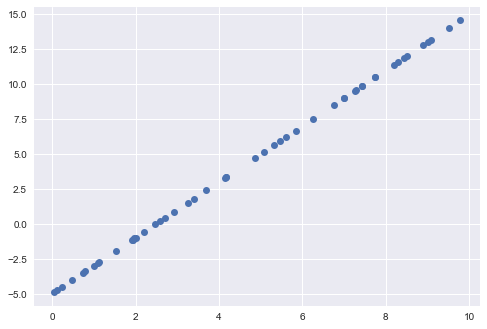

In [12]:
plt.plot(x,y ,'o' )

In [15]:
# 在后面添加一个随机数扰动项
y2 = 2*x - 5 + np.random.rand(50)
y2

array([ 9.36932204, 12.4455752 ,  8.5616223 ,  9.86196142, 14.1018538 ,
       -4.27871613,  3.68520467, -3.60146141, -2.20651846,  5.21784466,
       -0.0978672 , 10.20177975, -0.77817316,  9.72238309,  1.09559709,
       11.03785952, -4.57826303, -2.01263563, -1.83835423,  0.7277871 ,
       -3.67148325, 10.37545924,  2.61449531, -0.41827453, 13.87169611,
       14.66199512,  6.53242359,  1.01544207,  7.09692586,  2.28963864,
       13.2689642 ,  8.05412497, 12.09129115,  6.07008078,  3.78703867,
       10.00230427,  2.73200364, -3.26312364, 11.01130384, -0.1844004 ,
       -2.8766851 ,  5.60469463, -1.08317311, 11.61066333, -1.09509165,
        0.77618415,  6.96500174, 13.43605067, 12.18211775,  3.7389683 ])

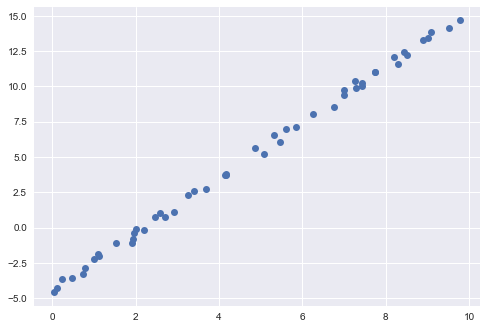

In [16]:
plt.plot(x, y2, 'o')

In [18]:
# 在后面添加一个标准正态分布中抽取出的扰动项
y3 = 2*x - 5 + np.random.randn(50)

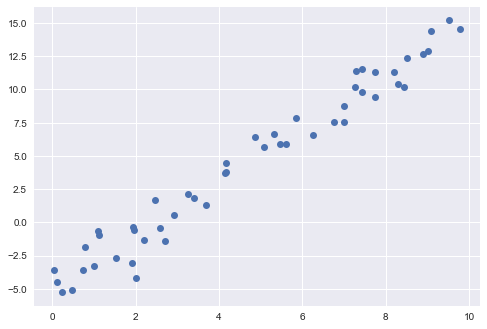

In [20]:
plt.plot(x,y3 , 'o')

In [21]:
# 导入线性回归模型
from sklearn.linear_model import LinearRegression

In [22]:
# 实例化
lr = LinearRegression(fit_intercept=True)

In [24]:
x

array([7.00437122, 8.44186643, 6.76514336, 7.27858057, 9.51457957,
       0.12703197, 4.13587699, 0.48812794, 0.99928561, 5.08066306,
       2.00247539, 7.44154169, 1.92892003, 7.00844752, 2.93228106,
       7.74479454, 0.05108839, 1.12857654, 1.10953672, 2.47668229,
       0.23236299, 7.27321154, 3.40034942, 1.97503156, 9.09179593,
       9.78346985, 5.32802544, 2.59131849, 5.83812619, 3.25690653,
       8.88899314, 6.26404527, 8.18873691, 5.4734542 , 4.16712006,
       7.43047192, 3.69596381, 0.75166544, 7.75192978, 2.19409244,
       0.79342127, 4.86780522, 1.53673902, 8.28465133, 1.91368568,
       2.70408954, 5.61034421, 9.0238039 , 8.51788342, 4.18081961])

In [26]:
x.shape

(50,)

In [36]:
x2 = x[:, np.newaxis]

In [37]:
x2

array([[7.00437122],
       [8.44186643],
       [6.76514336],
       [7.27858057],
       [9.51457957],
       [0.12703197],
       [4.13587699],
       [0.48812794],
       [0.99928561],
       [5.08066306],
       [2.00247539],
       [7.44154169],
       [1.92892003],
       [7.00844752],
       [2.93228106],
       [7.74479454],
       [0.05108839],
       [1.12857654],
       [1.10953672],
       [2.47668229],
       [0.23236299],
       [7.27321154],
       [3.40034942],
       [1.97503156],
       [9.09179593],
       [9.78346985],
       [5.32802544],
       [2.59131849],
       [5.83812619],
       [3.25690653],
       [8.88899314],
       [6.26404527],
       [8.18873691],
       [5.4734542 ],
       [4.16712006],
       [7.43047192],
       [3.69596381],
       [0.75166544],
       [7.75192978],
       [2.19409244],
       [0.79342127],
       [4.86780522],
       [1.53673902],
       [8.28465133],
       [1.91368568],
       [2.70408954],
       [5.61034421],
       [9.023

In [49]:
x

array([7.00437122, 8.44186643, 6.76514336, 7.27858057, 9.51457957,
       0.12703197, 4.13587699, 0.48812794, 0.99928561, 5.08066306,
       2.00247539, 7.44154169, 1.92892003, 7.00844752, 2.93228106,
       7.74479454, 0.05108839, 1.12857654, 1.10953672, 2.47668229,
       0.23236299, 7.27321154, 3.40034942, 1.97503156, 9.09179593,
       9.78346985, 5.32802544, 2.59131849, 5.83812619, 3.25690653,
       8.88899314, 6.26404527, 8.18873691, 5.4734542 , 4.16712006,
       7.43047192, 3.69596381, 0.75166544, 7.75192978, 2.19409244,
       0.79342127, 4.86780522, 1.53673902, 8.28465133, 1.91368568,
       2.70408954, 5.61034421, 9.0238039 , 8.51788342, 4.18081961])

In [38]:
# 模型训练
lr.fit(x2 , y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
# 拟合出的斜率
lr.coef_

array([2.])

In [41]:
# 拟合出的截距
lr.intercept_

-5.000000000000001

In [42]:
# 生成一个用于绘制直线的横坐标
xfit = np.linspace(0,10,100)

In [43]:
# 用模型对这些数据进行预测
yfit = lr.predict(xfit[:, np.newaxis])

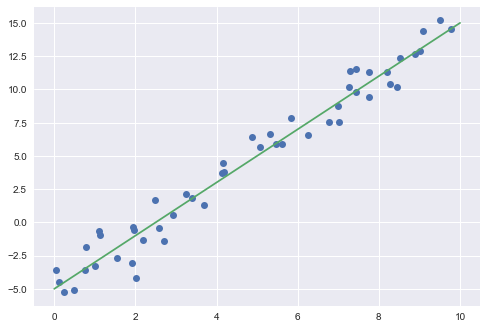

In [48]:
plt.plot(x,y3, 'o')
plt.plot(xfit,yfit)

### 加利福尼亚放房价预测问题

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing #加利福尼亚房屋价值数据集
import pandas as pd

### 下载数据集

In [52]:
housevalue = fetch_california_housing()

In [54]:
housevalue.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [57]:
print(housevalue.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [55]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
"""
特征解释
MedInc：该街区住户的收入中位数
HouseAge：该街区房屋使用年代的中位数
AveRooms：该街区平均的房间数目
AveBedrms：该街区平均的卧室数目
Population：街区人口
AveOccup：平均入住率
Latitude：街区的纬度
Longitude：街区的经度
""";

In [58]:
X = pd.DataFrame(housevalue.data, columns=housevalue.feature_names)



In [59]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [60]:
y = housevalue.target

### 拆分训练集和测试集

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
            test_size=0.3, random_state=666)

In [65]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17239,2.5104,30.0,3.916923,1.055385,1082.0,3.329231,34.43,-119.69
850,3.7462,15.0,4.900314,0.999215,3163.0,2.482732,37.59,-122.05
13502,2.4444,36.0,6.154122,1.247312,1054.0,3.777778,34.16,-117.35
2756,1.5931,18.0,3.929654,0.988095,3565.0,3.858225,32.68,-115.50
184,2.3929,52.0,4.471429,1.067857,844.0,3.014286,37.80,-122.23
10068,4.1190,18.0,5.843575,1.139665,486.0,2.715084,39.33,-120.17
5743,3.8576,20.0,4.449514,1.059835,2593.0,1.939417,34.17,-118.26
17589,3.6429,28.0,4.116711,1.075597,1488.0,1.973475,37.31,-121.91
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
1358,2.5833,38.0,5.030120,1.112450,1595.0,3.202811,38.04,-121.97


### 线性回归建模

In [144]:
# 实例化
lr = LinearRegression()

In [145]:
# 训练数据集
lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [146]:
# 查看模型在训练集上R2的值
lr.score(X_train, y_train)

0.6082747198760894

In [147]:
# 测试集
lr.score(X_test , y_test)

0.5991932192526277

In [148]:
y_pred = lr.predict(X_test)

In [149]:
y_train_predict = lr.predict(X_train)

In [150]:
y_train_predict

array([2.17567626, 2.13052503, 1.17965784, ..., 1.00437331, 1.57254239,
       1.47268172])

In [80]:
y_train

array([2.281, 2.125, 0.734, ..., 0.48 , 0.983, 1.45 ])

In [151]:
y_pred

array([1.94861414, 1.28751704, 0.72952491, ..., 4.13182042, 2.43947997,
       1.36345318])

In [77]:
y_test

array([1.161, 0.584, 0.687, ..., 2.75 , 2.301, 1.75 ])

In [81]:
# 查看系数
lr.coef_

array([ 4.40228234e-01,  9.48391521e-03, -1.12843342e-01,  6.09712715e-01,
       -4.00482664e-06, -3.96962732e-03, -4.12468279e-01, -4.26552274e-01])

In [82]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [87]:
# 将两个进行打包查看
list(zip(X_train.columns,lr.coef_))

[('MedInc', 0.440228234473077),
 ('HouseAge', 0.009483915211687993),
 ('AveRooms', -0.11284334216964098),
 ('AveBedrms', 0.6097127147709994),
 ('Population', -4.004826640747858e-06),
 ('AveOccup', -0.003969627317461856),
 ('Latitude', -0.4124682789498434),
 ('Longitude', -0.4265522739083784)]

In [88]:
lr.intercept_

-36.25068267909076

In [ ]:
"""
特征解释
MedInc：该街区住户的收入中位数
HouseAge：该街区房屋使用年代的中位数
AveRooms：该街区平均的房间数目
AveBedrms：该街区平均的卧室数目
Population：街区人口
AveOccup：平均入住率
Latitude：街区的纬度
Longitude：街区的经度
""";

In [83]:
L1 = [1,2,3]
L2 = [10,20,30]

In [85]:
list(zip(L1,L2))

[(1, 10), (2, 20), (3, 30)]

## 回归类的模型评估指标

### MSE均方误差

sklearn中使用RSS的变体，均方误差MSE（mean squared error）来衡量我们的预测值和真实值的差异：

$$
MSE = \frac{1}{m}\sum_{i=1}^{m}({y_i} - {\hat{y}_i})^2
$$

在sklearn当中，我们有两种方式调用这个评估指标，一种是使用sklearn专用的模型评估模块metrics里的类mean_squared_error，另一种是调用交叉验证的类cross_val_score并使用里面的scoring参数来设置使用均方误差。

In [89]:
# 导包
from sklearn.metrics import mean_squared_error

In [90]:
# 训练集上的平均标准误差
mean_squared_error(y_train , y_train_predict)

0.5269224022806525

In [91]:
# 测试集
mean_squared_error(y_test , y_pred)

0.5208993613292042

In [93]:
y.max()

5.00001

In [94]:
y.min()

0.14999

In [95]:
np.sqrt(mean_squared_error(y_test , y_pred))

0.7217335805747189

### 交叉验证方法计算模型指标

In [96]:
# 实例化
lr2 = LinearRegression()

In [102]:
# 交叉验证中使用这个指标
cross_val_score(lr2, X,y, cv= 10 ,scoring='neg_mean_squared_error')

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

In [103]:
# 交叉验证中使用这个指标, 求平均值
cross_val_score(lr2, X,y, cv= 10 ,scoring='neg_mean_squared_error').mean()

-0.550952429695659

In [101]:
# 查看交叉验证中可以使用的指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

我们看到,均方误差都是负的值

虽然均方误差,从公式角度来看应该永远为正，
但是sklearn中的参数scoring下，均方误差作为评判标准时，却是计算”负均方误差“（neg_mean_squared_error）。

这是因为sklearn在计算模型评估指标的时候，会考虑指标本身的性质，均方误差本身是一种误差，所以被sklearn划分为模型的一种损失(loss)。

在sklearn当中，所有的损失都使用负数表示，因此均方误差也被显示为负数了。真正的均方误差MSE的数值，其实就是neg_mean_squared_error去掉负号的数字。

### MAE

MAE（Mean absolute error，绝对均值误差）

除了MSE，我们还有与MSE类似的MAE（Mean absolute error，绝对均值误差）：

$$
MAE = \frac{1}{m}\sum_{i=0}^{m-1}|{y_i} - {\hat{y}_i}|
$$

其表达的概念与均方误差完全一致，不过在真实标签和预测值之间的差异外我们使用的是L1范式（绝对值）。

使用中，MSE和MAE选一个来使用就好了。

在sklearn当中，我们使用命令
from sklearn.metrics import mean_absolute_error来调用MAE，同时，我们也可以使用交叉验证中的
scoring = "neg_mean_absolute_error"，以此在交叉验证时调用MAE。

In [105]:
# 导包
from sklearn.metrics import mean_absolute_error

In [106]:
# 训练集上的平均标准误差
mean_absolute_error(y_train , y_train_predict)

0.5332743844219638

In [107]:
# 测试集
mean_absolute_error(y_test , y_pred)

0.5289096689562117

In [108]:
# 交叉验证中使用这个指标
cross_val_score(lr2, X,y, cv= 10 ,scoring='neg_mean_absolute_error')

array([-0.5351668 , -0.52910504, -0.67851477, -0.47485745, -0.65197842,
       -0.50092187, -0.39629861, -0.64006268, -0.60286176, -0.435447  ])

### 是否拟合了足够的信息

对于回归类算法而言，只探索数据预测是否准确是不足够的。除了数据本身的数值大小之外，我们还希望我们的模型能够捕捉到数据的”规律“，比如数据的分布规律，单调性等等，而是否捕获了这些信息并无法使用MSE来衡量。

![](https://pictes.oss-cn-beijing.aliyuncs.com/%E5%BE%AE%E8%AF%BE%20-%20sklearn/week%209%20Linear%20Model/MSE.PNG)

来看这张图，其中红色线是我们的真实标签，而蓝色线是我们的拟合模型。

这是一种比较极端，但的确可能发生的情况。

这张图像上，前半部分的拟合非常成功，看上去我们的真实标签和我们的预测结果几乎重合，但后半部分的拟合却非常糟糕，模型向着与真实标签完全相反的方向去了。

对于这样的一个拟合模型，如果我们使用MSE来对它进行判断，它的MSE会很小，因为大部分样本其实都被完美拟合了，少数样本的真实值和预测值的巨大差异在被均分到每个样本上之后，MSE就会很小。

但这样的拟合结果必然不是一个好结果，因为一旦我的新样本是处于拟合曲线的后半段的，我的预测结果必然会有巨大的偏差，而这不是我们希望看到的。

所以，我们希望找到新的指标，除了判断预测的数值是否正确之外，还能够判断我们的模型是否拟合了足够多的，数值之外的信息。

在我们学习降维算法PCA的时候，我们提到我们使用方差来衡量数据上的信息量。

如果方差越大，代表数据上的信息量越多，而这个信息量不仅包括了数值的大小，还包括了我们希望模型捕捉的那些规律。

为了衡量模型对数据上的信息量的捕捉，我们定义了**$R^2$**来帮助我们：

$$
R^2 = 1 - \frac{\sum_{i=0}^{m}({y_i} - {{\hat{y}_i}})^2}{\sum_{i=0}^{m}({y_i} - \bar{y})^2} = 1 - \frac{RSS}{\sum_{i=0}^{m}({y_i} - \bar{y})^2}
$$

其中$\boldsymbol{y}$是真实标签，$\boldsymbol{\hat{y}}$是预测结果，$\boldsymbol{\bar{y}}$是均值，$y_i - \bar{y}$如果除以样本量m就是我们的方差。

方差的本质是任意一个$y$值和样本均值的差异，差异越大，这些值所带的信息越多。

在$R^2$中，分子是真实值和预测值之差的差值，也就是我们的模型没有捕获到的信息总量，分母是真实标签所带的信息量，所以其衡量的是**1 - 我们的模型没有捕获到的信息量占真实标签中所带的信息量的比例**，所以，$R^2$越接近1越好。

$R^2$可以使用三种方式来调用，一种是直接从metrics中导入r2_score，输入预测值和真实值后打分。

第二种是直接从线性回归LinearRegression的接口score来进行调用。

第三种是在交叉验证中，输入"r2"来调用。

In [109]:
# R方
lr.score(X_train , y_train)

0.6082747198760894

In [111]:
lr.score(X_test , y_test)

0.5991932192526277

In [112]:
from sklearn.metrics import r2_score

In [113]:
r2_score(y_train, y_train_predict)

0.6082747198760894

In [114]:
r2_score(y_test, y_pred)

0.5991932192526277

In [115]:
# 交叉验证中使用这个指标
cross_val_score(lr2, X,y, cv= 10 ,scoring='r2')

array([0.48254494, 0.61416063, 0.42274892, 0.48178521, 0.55705986,
       0.5412919 , 0.47496038, 0.45844938, 0.48177943, 0.59528796])

In [116]:
# 交叉验证中使用这个指标
cross_val_score(lr2, X,y, cv= 10 ,scoring='r2').mean()

0.5110068610524556

### 把数据集标准化之后重复上面的过程

In [135]:
# 导入标准化API
from sklearn.preprocessing import StandardScaler

In [136]:
# 实例化
std = StandardScaler()

In [137]:
# fit transform
X_train_std = std.fit_transform(X_train)

In [138]:
X_train_std

array([[-0.71269499,  0.10824461, -0.63623996, ...,  0.02156331,
        -0.55369787, -0.06790776],
       [-0.06787464, -1.08352393, -0.22089854, ..., -0.05112161,
         0.92755362, -1.24766887],
       [-0.74713271,  0.58495203,  0.30865523, ...,  0.06007794,
        -0.6802605 ,  1.10185537],
       ...,
       [-1.50335389,  1.06165945, -0.61669009, ...,  0.03378547,
        -0.10838492,  0.29201936],
       [-0.88310956,  0.26714708, -0.57693074, ...,  0.10839641,
        -0.80682312,  0.65694546],
       [-0.86651683, -0.20956033, -0.6969943 , ..., -0.06020689,
        -0.7833856 ,  0.8069151 ]])

In [152]:
# 实例化
# 实例化
lr2 = LinearRegression()

In [153]:
# 训练数据集
lr2.fit(X_train_std , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [154]:
# 对测试集进行转换
X_test_std = std.transform(X_test)

In [155]:
y_train_predict2 = lr2.predict(X_train_std)
y_pred2 = lr2.predict(X_test_std)

In [158]:
y_train_predict2

array([2.17567626, 2.13052503, 1.17965784, ..., 1.00437331, 1.57254239,
       1.47268172])

In [159]:
y_train_predict

array([2.17567626, 2.13052503, 1.17965784, ..., 1.00437331, 1.57254239,
       1.47268172])

In [160]:
y_pred

array([1.94861414, 1.28751704, 0.72952491, ..., 4.13182042, 2.43947997,
       1.36345318])

In [161]:
y_pred2

array([1.94861414, 1.28751704, 0.72952491, ..., 4.13182042, 2.43947997,
       1.36345318])

In [162]:
lr2.coef_

array([ 0.84369864,  0.11936775, -0.26717565,  0.29269693, -0.00443982,
       -0.04623086, -0.87993144, -0.85327729])

In [177]:
Pop = X_train.Population

In [178]:
(Pop - Pop.mean()) / Pop.std()

17239   -0.308212
850      1.568837
13502   -0.333468
2756     1.931439
184     -0.522886
10068   -0.845800
5743     1.054701
17589    0.057998
1        0.881518
1358     0.154511
556      0.597390
12603    0.880616
11384   -0.707795
9852    -0.443511
2489    -0.106165
3458     1.116036
4023    -0.339782
13361   -1.194872
5922    -0.912548
18909    2.258863
2066    -0.374959
18851   -0.245974
1869    -0.425471
520     -0.163893
18159   -0.429079
18782   -0.996433
14892    0.055292
8407     0.361068
7331    -0.320840
10164   -0.720423
           ...   
1956    -1.000943
15693   -0.848506
14352    0.652412
17071   -0.494023
20602    0.165335
12126    3.951003
8868     0.012898
8816    -0.954039
15652    1.656331
20504    0.994267
18708   -0.356018
9077    -0.645558
18573   -0.058360
4047     0.908578
204      1.253139
11333    0.181571
10640   -0.134127
8767    -0.931490
19169    1.022229
10396    0.244710
13372   -0.297388
16606    4.204463
1115    -0.653676
1469     1.172862
16292   -0

In [181]:
X_train_std[:,4]

array([-0.30822255,  1.56889161, -0.33347925, ..., -0.34791166,
       -0.19186132, -0.16931069])

In [164]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17239,2.5104,30.0,3.916923,1.055385,1082.0,3.329231,34.43,-119.69
850,3.7462,15.0,4.900314,0.999215,3163.0,2.482732,37.59,-122.05
13502,2.4444,36.0,6.154122,1.247312,1054.0,3.777778,34.16,-117.35
2756,1.5931,18.0,3.929654,0.988095,3565.0,3.858225,32.68,-115.50
184,2.3929,52.0,4.471429,1.067857,844.0,3.014286,37.80,-122.23


In [163]:
# 将两个进行打包查看
list(zip(X_train.columns,lr2.coef_))

[('MedInc', 0.8436986416007354),
 ('HouseAge', 0.11936774866894509),
 ('AveRooms', -0.2671756515524574),
 ('AveBedrms', 0.2926969276242641),
 ('Population', -0.004439817451324716),
 ('AveOccup', -0.04623086241312066),
 ('Latitude', -0.8799314407209978),
 ('Longitude', -0.8532772941241827)]

In [133]:
# 训练集上的平均标准误差
mean_squared_error(y_train , y_train_predict)

0.5269224022806525

In [134]:
# 测试集
mean_squared_error(y_test , y_pred)

0.5208993613292042

In [128]:
lr.coef_

array([ 0.84369864,  0.11936775, -0.26717565,  0.29269693, -0.00443982,
       -0.04623086, -0.87993144, -0.85327729])

In [129]:
# 将两个进行打包查看
list(zip(X_train.columns,lr.coef_))

[('MedInc', 0.8436986416007354),
 ('HouseAge', 0.11936774866894509),
 ('AveRooms', -0.2671756515524574),
 ('AveBedrms', 0.2926969276242641),
 ('Population', -0.004439817451324716),
 ('AveOccup', -0.04623086241312066),
 ('Latitude', -0.8799314407209978),
 ('Longitude', -0.8532772941241827)]

In [219]:
# 通过normalize 标准化进行数据的转换
lr3 = LinearRegression(normalize=True)

In [220]:
lr3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [221]:
lr3.coef_

array([ 4.40228234e-01,  9.48391521e-03, -1.12843342e-01,  6.09712715e-01,
       -4.00482664e-06, -3.96962732e-03, -4.12468279e-01, -4.26552274e-01])

In [222]:
list(zip(lr3.coef_, X_train.columns))

[(0.44022823447307663, 'MedInc'),
 (0.009483915211687679, 'HouseAge'),
 (-0.11284334216964106, 'AveRooms'),
 (0.6097127147710014, 'AveBedrms'),
 (-4.00482664073668e-06, 'Population'),
 (-0.003969627317461983, 'AveOccup'),
 (-0.41246827894984467, 'Latitude'),
 (-0.42655227390837824, 'Longitude')]

In [170]:
y_train_normalize = lr3.predict(X_train)

In [174]:
y_train_normalize

array([2.17567626, 2.13052503, 1.17965784, ..., 1.00437331, 1.57254239,
       1.47268172])

In [175]:
y_train_predict

array([2.17567626, 2.13052503, 1.17965784, ..., 1.00437331, 1.57254239,
       1.47268172])

In [176]:
y_train_predict2

array([2.17567626, 2.13052503, 1.17965784, ..., 1.00437331, 1.57254239,
       1.47268172])

In [ ]:
y_train_predict2 = lr2.predict(X_train_std)
y_pred2 = lr2.predict(X_test_std)

### 绘制拟合图像

让我们用绘图来看看，究竟是不是这样一回事。我们可以在一张图上绘制出预测值的散点图和真实值的折线图，如果两者趋势越接近，并且预测值的散点图越靠近真实值，则我们认为模型拟合优秀。

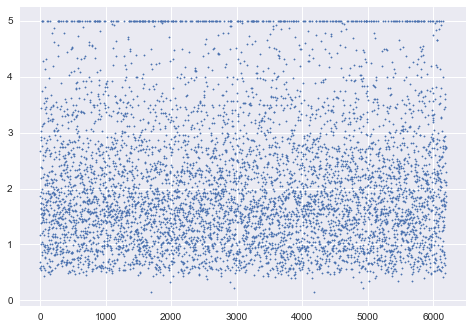

In [183]:
#如果现在对y_test直接绘图，会得到什么结果？
# 因为数据是无序的,所以画出来的点是散乱的
plt.scatter(range(len(y_test)), y_test ,s=2)
plt.show()

In [184]:
sorted(y_test)

[0.14999,
 0.14999,
 0.225,
 0.225,
 0.325,
 0.329,
 0.332,
 0.342,
 0.344,
 0.35,
 0.375,
 0.394,
 0.398,
 0.4,
 0.4,
 0.4,
 0.425,
 0.425,
 0.425,
 0.43,
 0.431,
 0.431,
 0.435,
 0.435,
 0.436,
 0.437,
 0.44,
 0.444,
 0.446,
 0.45,
 0.45,
 0.45,
 0.451,
 0.455,
 0.455,
 0.455,
 0.467,
 0.468,
 0.47,
 0.474,
 0.475,
 0.475,
 0.475,
 0.476,
 0.477,
 0.477,
 0.478,
 0.48,
 0.483,
 0.483,
 0.483,
 0.483,
 0.485,
 0.485,
 0.486,
 0.486,
 0.488,
 0.488,
 0.488,
 0.49,
 0.492,
 0.493,
 0.493,
 0.495,
 0.5,
 0.5,
 0.5,
 0.502,
 0.505,
 0.505,
 0.506,
 0.506,
 0.508,
 0.508,
 0.508,
 0.509,
 0.513,
 0.513,
 0.513,
 0.515,
 0.516,
 0.516,
 0.517,
 0.517,
 0.517,
 0.517,
 0.518,
 0.52,
 0.521,
 0.525,
 0.525,
 0.525,
 0.526,
 0.526,
 0.527,
 0.528,
 0.528,
 0.529,
 0.53,
 0.533,
 0.533,
 0.534,
 0.534,
 0.535,
 0.535,
 0.536,
 0.538,
 0.538,
 0.538,
 0.54,
 0.542,
 0.542,
 0.542,
 0.542,
 0.542,
 0.543,
 0.543,
 0.544,
 0.544,
 0.544,
 0.544,
 0.544,
 0.546,
 0.547,
 0.55,
 0.55,
 0.55,
 0.55,


In [197]:
y_test[1689]

0.14999

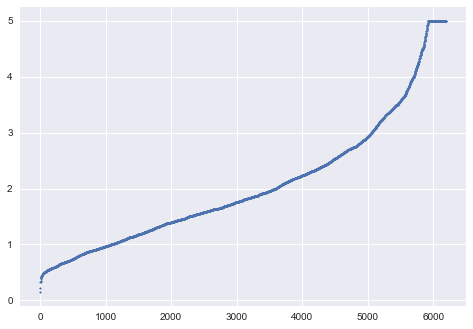

In [185]:
plt.scatter(range(len(y_test)), sorted(y_test) ,s=2)
plt.show()

In [186]:
y_pred

array([1.94861414, 1.28751704, 0.72952491, ..., 4.13182042, 2.43947997,
       1.36345318])

In [198]:
y_pred[[1689,4171,2963]]

array([2.54618878, 0.20409984, 0.69331528])

In [200]:
y_pred[np.argsort(y_test)]

array([2.54618878, 0.20409984, 1.34218811, ..., 3.39724775, 4.44696287,
       4.71775801])

In [187]:
y_test

array([1.161, 0.584, 0.687, ..., 2.75 , 2.301, 1.75 ])

In [188]:
np.argsort(y_test)

array([1689, 4171, 2962, ..., 5742, 2313, 4507])

In [190]:
# 构建一个Series
y_pred_nosort = pd.Series(data =y_pred , index= np.argsort(y_test))

In [214]:
y_pred_nosort = pd.DataFrame(y_pred)

In [215]:
y_pred_nosort

,0
0,1.948614
1,1.287517
2,0.729525
3,2.032478
4,1.305461
5,2.364045
6,3.018880
7,2.093278
8,1.346603
9,3.002115


In [217]:
pd.DataFrame(data = y_pred_nosort , index =np.argsort(y_test) )

,0
1689,2.546189
4171,0.204100
2962,1.342188
4922,1.932682
4901,0.813972
2902,-0.519681
1979,1.068687
5676,-0.137972
5453,1.122947
5016,1.009098


In [218]:
y_pred[np.argsort(y_test)]

array([2.54618878, 0.20409984, 1.34218811, ..., 3.39724775, 4.44696287,
       4.71775801])

In [216]:
np.argsort(y_test)

array([1689, 4171, 2962, ..., 5742, 2313, 4507])

In [210]:
y_pred_nosort = pd.DataFrame(y_pred)

In [212]:
pd.DataFrame(y_pred_nosort , index=np.argsort(y_test))

,0
1689,2.546189
4171,0.204100
2962,1.342188
4922,1.932682
4901,0.813972
2902,-0.519681
1979,1.068687
5676,-0.137972
5453,1.122947
5016,1.009098


In [211]:
y_pred_nosort

,0
0,1.948614
1,1.287517
2,0.729525
3,2.032478
4,1.305461
5,2.364045
6,3.018880
7,2.093278
8,1.346603
9,3.002115


In [192]:
y_pred[np.argsort(y_test)]

array([2.54618878, 0.20409984, 1.34218811, ..., 3.39724775, 4.44696287,
       4.71775801])

In [195]:
y_pred

array([1.94861414, 1.28751704, 0.72952491, ..., 4.13182042, 2.43947997,
       1.36345318])

In [ ]:
y_pred[np.argsort(y_test)]

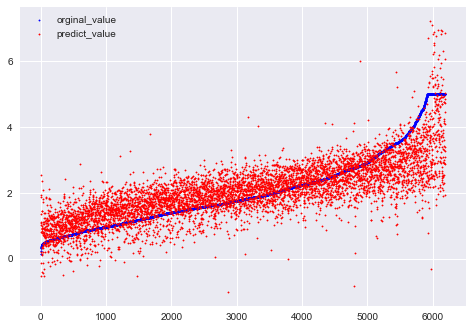

In [204]:
plt.scatter(range(len(y_test)), sorted(y_test) ,
            s=2 ,color= 'blue',label = 'orginal_value')
plt.scatter(range(len(y_test)),y_pred[np.argsort(y_test)],s=2,
           color = 'red',label = 'predict_value')
plt.legend()
plt.show()

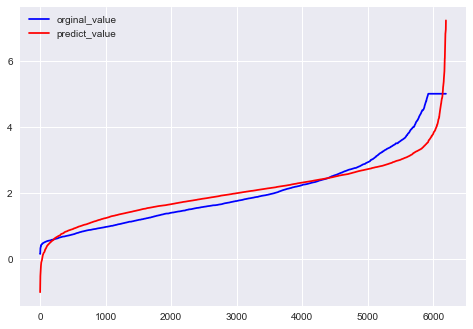

In [209]:
# 也可以简单粗暴排序来绘制曲线呢？
#我们可以绘制一张图上的两条曲线，一条曲线是我们的真实标签Ytest，另一条曲线是我们的预测结果yhat
#两条曲线的交叠越多，我们的模型拟合就越好
plt.plot(range(len(y_test)), sorted(y_test) ,
            color= 'blue',label = 'orginal_value')
plt.plot(range(len(y_test)),sorted(y_pred[np.argsort(y_test)]),
           color = 'red',label = 'predict_value')
plt.legend()
plt.show()

In [224]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17239,2.5104,30.0,3.916923,1.055385,1082.0,3.329231,34.43,-119.69
850,3.7462,15.0,4.900314,0.999215,3163.0,2.482732,37.59,-122.05
13502,2.4444,36.0,6.154122,1.247312,1054.0,3.777778,34.16,-117.35
2756,1.5931,18.0,3.929654,0.988095,3565.0,3.858225,32.68,-115.50
184,2.3929,52.0,4.471429,1.067857,844.0,3.014286,37.80,-122.23
